## Fish No Fish CONVNET WOOPWOOP
I love buzzwords.


In [12]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l2, activity_l2
from keras.utils import np_utils
import cv2

%matplotlib inline

In [13]:
%load_ext autoreload
%autoreload 2
import sys
paths = ['../models', '../dataset', '../util']
for path in paths:
    if path not in sys.path:
        sys.path.append(path)
 
from bounding_boxes import *
from data_generators import get_data
import dataset_FishNoFish as dataset
from callbacks import ShowSegmentation

bboxes = get_bounding_boxes('../data')
bboxes = largest_bbox_per_image(bboxes)
train_data = dataset.train
val_data = dataset.validation
 
train_gen = get_data(train_data, '../../Data/train', dataset.labels, flip=True, shift_x=3, shift_y=3, rot_range=6, elastic_trans=False, colorize=True)
val_gen = get_data(val_data, '../../Data/train', dataset.labels, colorize=True)
n_labels = len(dataset.labels)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Function to define the layers of the convnet.

In [32]:
def keras_model_conv():
    model = Sequential()
    
    model.add(BatchNormalization(axis=1,  input_shape=(3, 256, 256)))
    model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu',))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.50))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.50))
    
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.50))
    
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(BatchNormalization(axis=1))
    
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(BatchNormalization(axis=1))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', W_regularizer=l2(1e-6)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

    return model

Initialization of the model.

In [33]:
model = keras_model_conv()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_8 (BatchNorma (None, 3, 256, 256)   12          batchnormalization_input_2[0][0] 
____________________________________________________________________________________________________
convolution2d_7 (Convolution2D)  (None, 16, 256, 256)  448         batchnormalization_8[0][0]       
____________________________________________________________________________________________________
batchnormalization_9 (BatchNorma (None, 16, 256, 256)  64          convolution2d_7[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 16, 128, 128)  0           batchnormalization_9[0][0]       
___________________________________________________________________________________________

Fit the model using a generator.

Use: 
fit_generator(self, generator, samples_per_epoch, nb_epoch, verbose=1, callbacks=None, validation_data=None, nb_val_samples=None, class_weight=None, max_q_size=10, nb_worker=1, pickle_safe=False, initial_epoch=0)


In [6]:
model.fit_generator(train_gen, samples_per_epoch=len(train_data),
                    nb_epoch=100, verbose=1,
                    callbacks=None,
                    validation_data=val_gen, nb_val_samples=len(val_data))

Epoch 1/100
736/761 [============================>.] - ETA: 0s - loss: 2.1716 - acc: 0.6508 

C:\Anaconda2\lib\site-packages\keras\engine\training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


768/761 [==============================] - 38s - loss: 2.1433 - acc: 0.6497 - val_loss: 0.7560 - val_acc: 0.5052
Epoch 2/100
768/761 [==============================] - 30s - loss: 0.9889 - acc: 0.7253 - val_loss: 1.9960 - val_acc: 0.4635

In [ ]:
model.fit_generator(train_gen, samples_per_epoch=len(train_data),
                    nb_epoch=50, verbose=1,
                    callbacks=None,
                    validation_data=val_gen, nb_val_samples=len(val_data))

In [16]:
model.load_weights("fish_nofishmodel_preproc.h5")


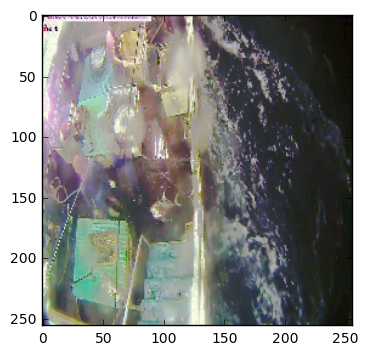

Label: [1 0]
Fish probability: 0.809328794479


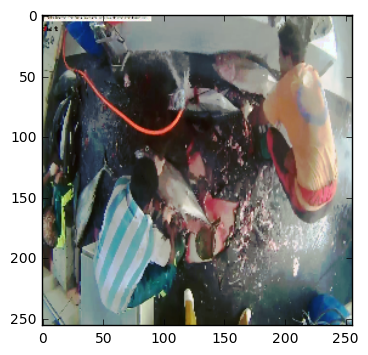

Label: [1 0]
Fish probability: 0.99998986721


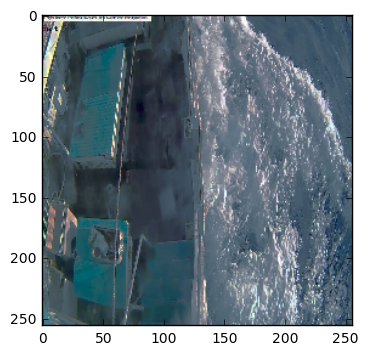

Label: [0 1]
Fish probability: 2.10953735005e-21


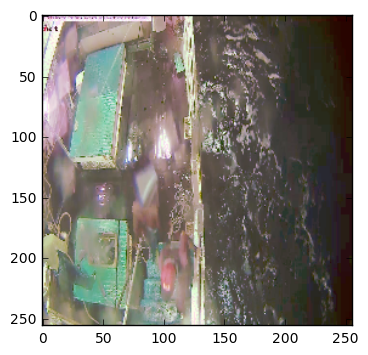

Label: [0 1]
Fish probability: 3.25095094074e-13


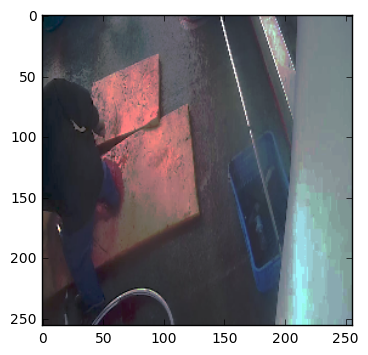

Label: [0 1]
Fish probability: 3.10888972308e-05


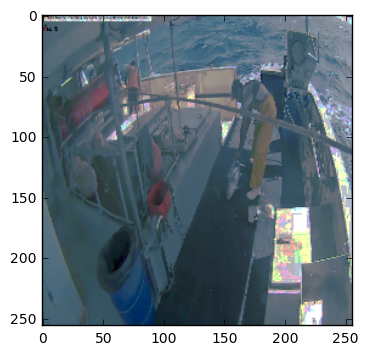

Label: [1 0]
Fish probability: 0.998286664486


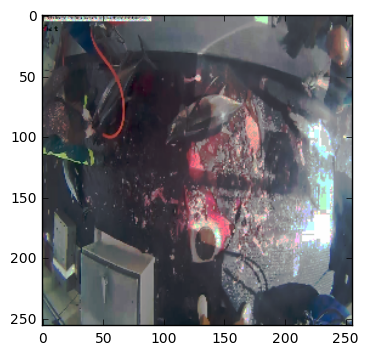

Label: [1 0]
Fish probability: 0.00287967151962


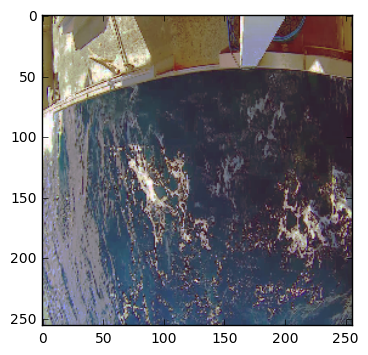

Label: [0 1]
Fish probability: 1.02908216519e-17


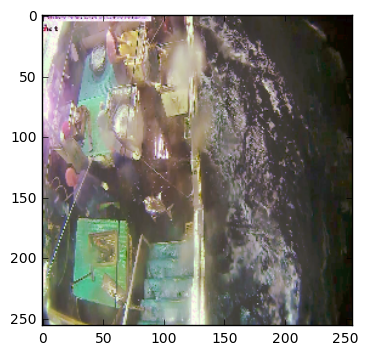

Label: [1 0]
Fish probability: 1.0


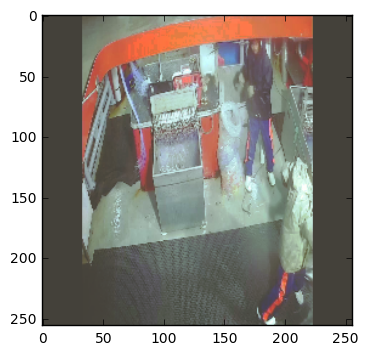

Label: [0 1]
Fish probability: 5.94692309036e-25


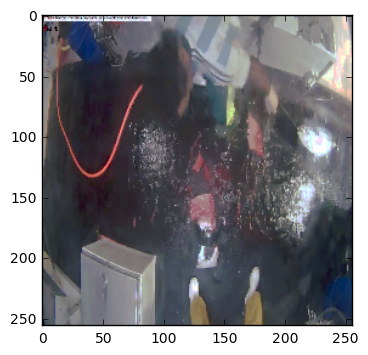

Label: [1 0]
Fish probability: 0.995466947556


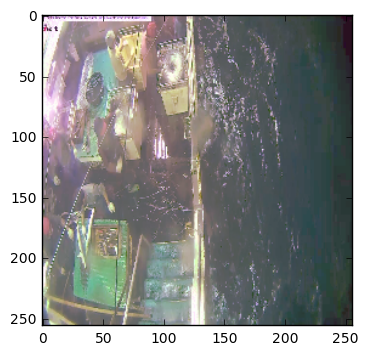

Label: [1 0]
Fish probability: 0.00579933589324


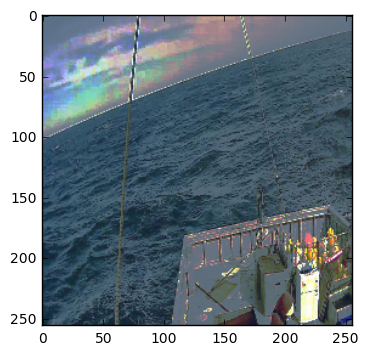

Label: [0 1]
Fish probability: 9.97846031084e-29


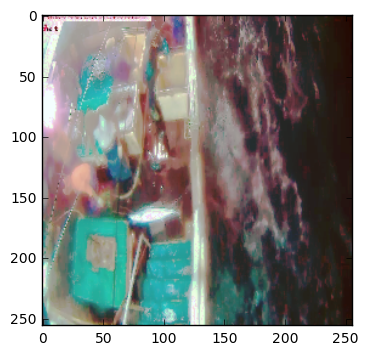

Label: [1 0]
Fish probability: 0.121592320502


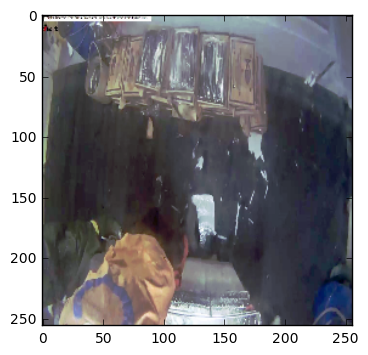

Label: [0 1]
Fish probability: 4.86842178776e-17


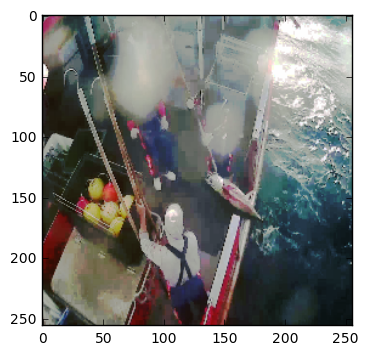

Label: [1 0]
Fish probability: 8.46834734908e-23


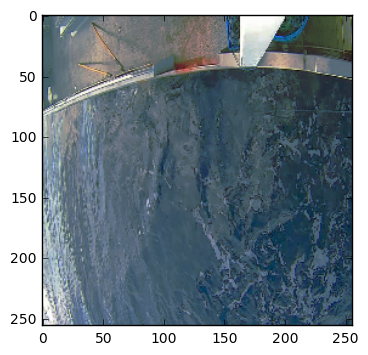

Label: [0 1]
Fish probability: 2.24485228815e-32


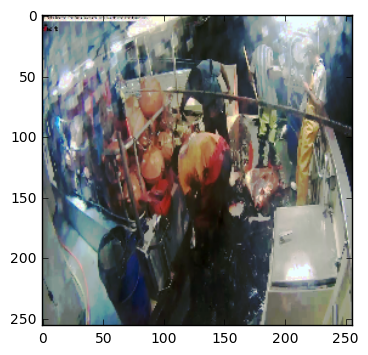

Label: [1 0]
Fish probability: 1.0


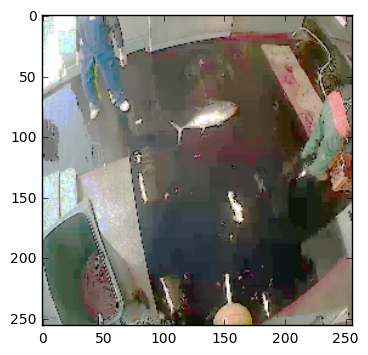

Label: [1 0]
Fish probability: 1.0


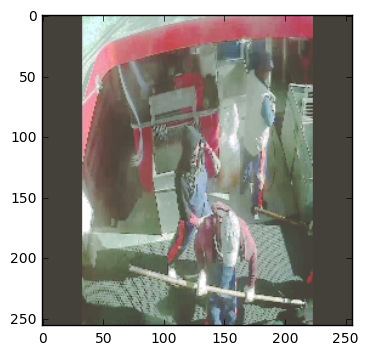

Label: [0 1]
Fish probability: 3.51728020891e-21


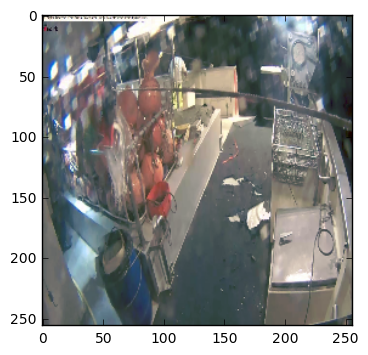

Label: [0 1]
Fish probability: 0.999971747398


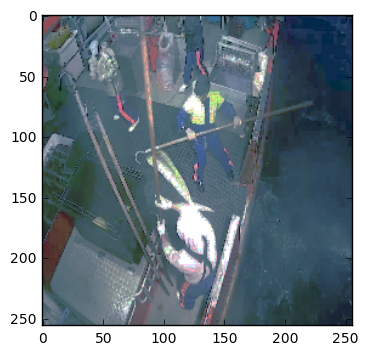

Label: [1 0]
Fish probability: 0.994905412197


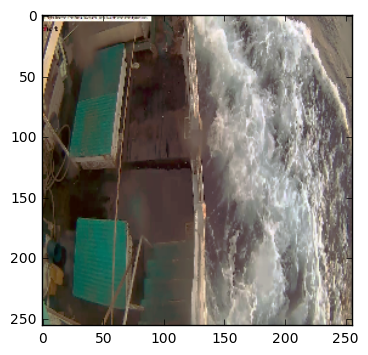

Label: [0 1]
Fish probability: 1.98990525388e-16


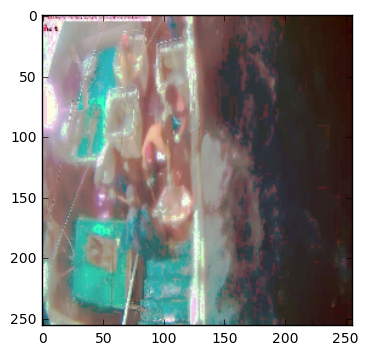

Label: [1 0]
Fish probability: 4.92374586052e-18


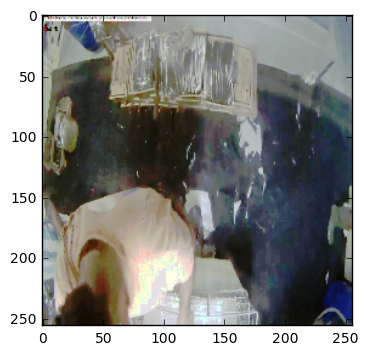

Label: [0 1]
Fish probability: 1.39657331419e-23


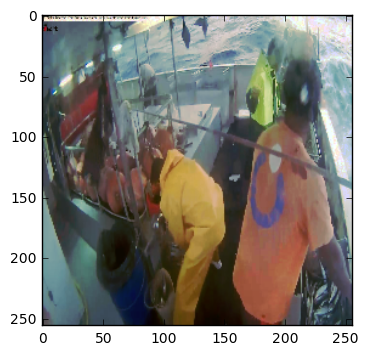

Label: [0 1]
Fish probability: 6.2001149106e-18


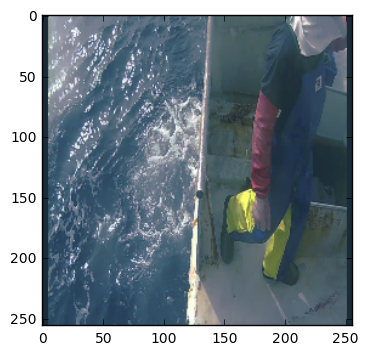

Label: [0 1]
Fish probability: 0.346308201551


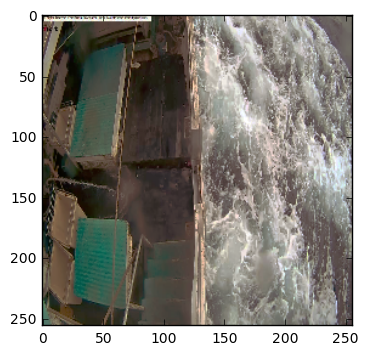

Label: [0 1]
Fish probability: 2.08434923789e-27


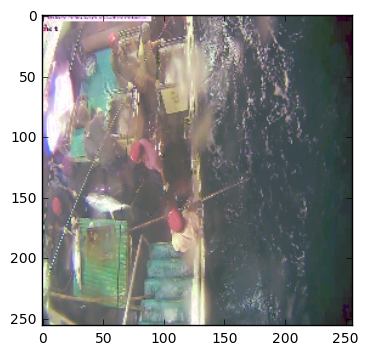

Label: [1 0]
Fish probability: 0.000336842640536


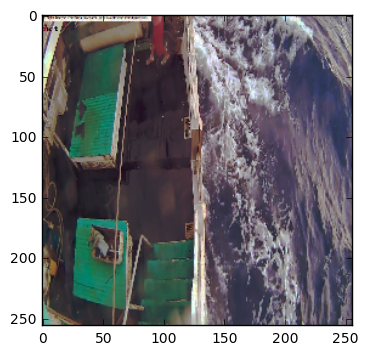

Label: [0 1]
Fish probability: 2.32322050486e-10


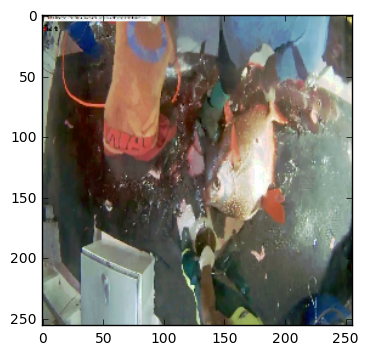

Label: [1 0]
Fish probability: 0.999977111816


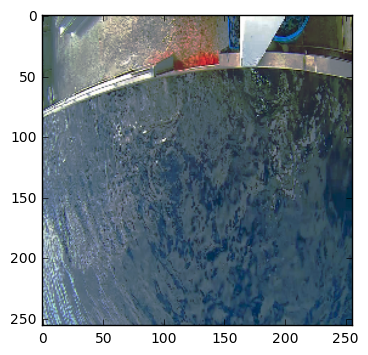

Label: [0 1]
Fish probability: 5.43579897985e-36


In [31]:
imgs, labels = next(val_gen)
prediction = model.predict(imgs)
for img, label, pred in zip(imgs, labels, prediction):
    plt.imshow(img.transpose(1,2,0) + 0.5)
    plt.show()
    print "Label: {}".format(label)
    print "Fish probability: {}".format(pred[0])
